# Baron Pancreas Mouse

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")
from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
ad = sc.read("../write/Baron_Mouse_reg.h5")

In [3]:
sc.tl.louvain(ad, resolution=1.5, key_added = 'louvain_r1.5')

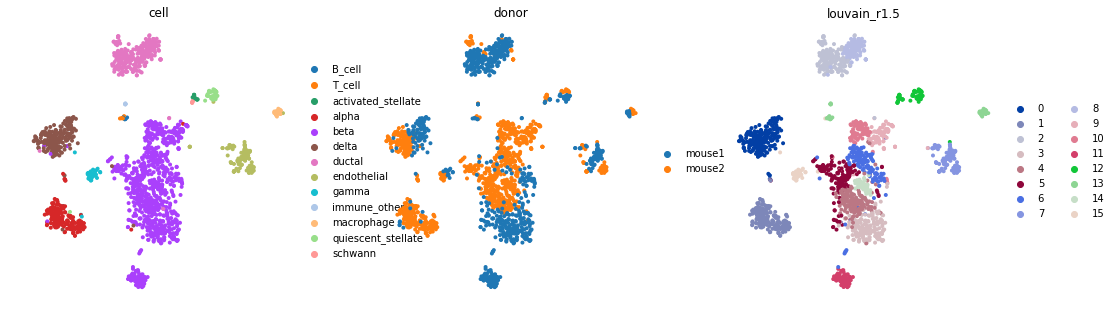

In [4]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','donor','louvain_r1.5'], frameon=False)

## SCCAF assessment
> use self-projection to test the global accuracy of a clustering (the human expert clustering). 
We find the discrimination between the human annotated cell types is very clear and the accuracy is up to 96%. It shows an almost-perfect clustering.

Mean CV accuracy: 0.9693
Accuracy on the training set: 0.9964
Accuracy on the hold-out set: 0.9812


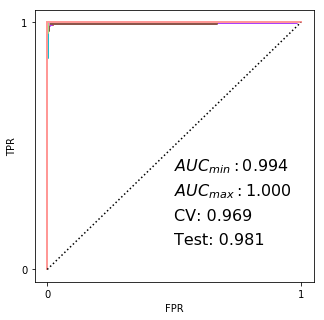

In [5]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.X, ad.obs['cell'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

## SCCAF recover
When the data annotation is unknown and we aim to identify the best clustering solution. 
We may start with a `over-clustering` and optimize the clustering by merging the clusters that cannot be discriminated by a machine learning model. 
(Here we use `logistic regression`, which uses a linear model, for the machine learning.) And we also constrain the optimization with a `under-clustering`.

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`).

We assign the optimization name (the `prefix` parameter) as `L1`, and the initial state of the optimization is named as `L1_Round0` kept in the `anndata.obs` slot.
Each Round of the optimization will increase the index, from `L1_Round1`, `L1_Round2` to `L1_Round10` ....

In [5]:
ad.obs['L1_Round0'] = ad.obs['louvain_r1.5']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9208
Accuracy on the training set: 0.9657
Accuracy on the hold-out set: 0.9098


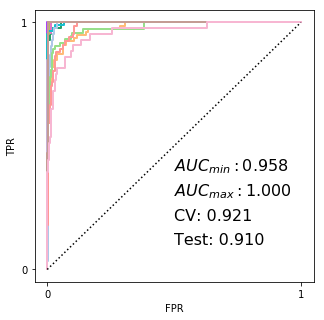

... storing 'L1_Round0_self-projection' as categorical


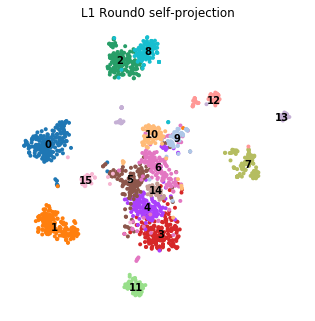

Accuracy on the training set: 0.9625
Accuracy on the hold-out set: 0.9171
Accuracy on the training set: 0.9636
Accuracy on the hold-out set: 0.9056
Max R1mat: 0.094595
Max R2mat: 0.010239


<Figure size 360x360 with 0 Axes>

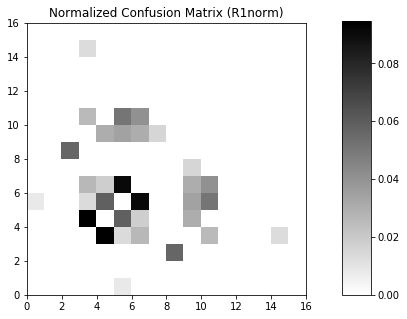

<Figure size 360x360 with 0 Axes>

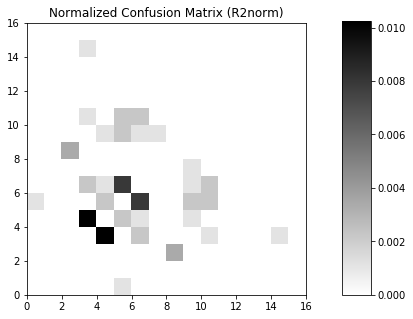

IGRAPH U-W- 16 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.094595
m2: 0.010239
Accuracy: 0.905561
start_iter: 0
R1norm_cutoff: 0.084595
R2norm_cutoff: 0.009239
Accuracy: 0.905561
Round1 ...
Mean CV accuracy: 0.9109
Accuracy on the training set: 0.9689
Accuracy on the hold-out set: 0.9119


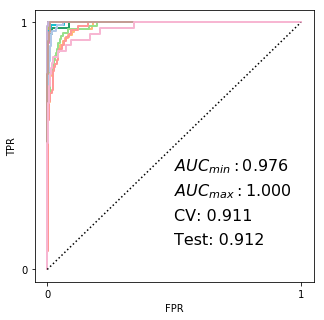

... storing 'L1_Round0_self-projection' as categorical


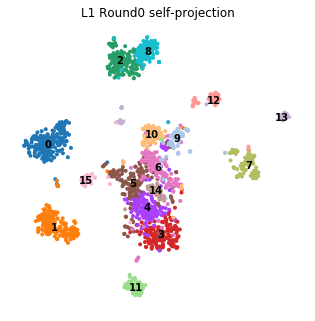

Accuracy on the training set: 0.9571
Accuracy on the hold-out set: 0.9087
Accuracy on the training set: 0.9636
Accuracy on the hold-out set: 0.9140
Max R1mat: 0.109375
Max R2mat: 0.008999


<Figure size 360x360 with 0 Axes>

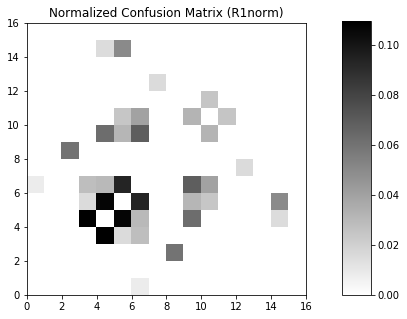

<Figure size 360x360 with 0 Axes>

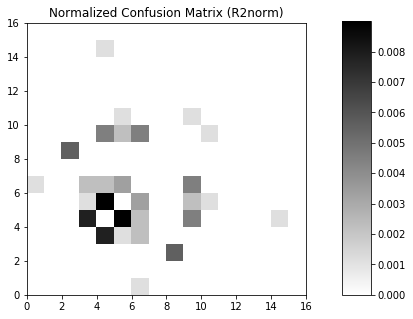

... storing 'L1_Round1' as categorical


IGRAPH U-W- 16 6 --
+ attr: weight (e)
+ edges:
3--4 3--4 4--5 4--5 5--6 5--6


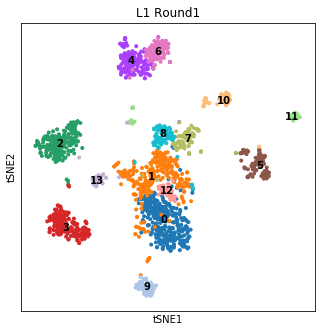

Round2 ...
Mean CV accuracy: 0.9246
Accuracy on the training set: 0.9784
Accuracy on the hold-out set: 0.9183


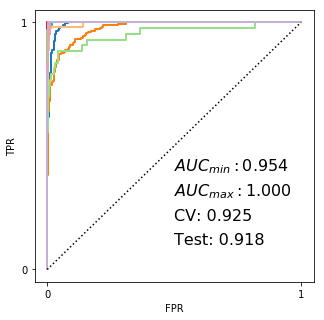

... storing 'L1_Round1_self-projection' as categorical


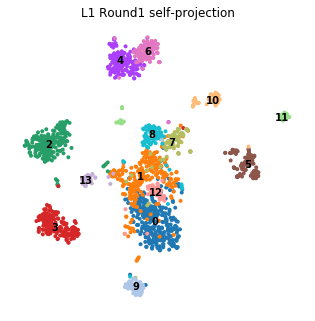

Accuracy on the training set: 0.9784
Accuracy on the hold-out set: 0.9211
Accuracy on the training set: 0.9784
Accuracy on the hold-out set: 0.9183
Max R1mat: 0.156250
Max R2mat: 0.030785


<Figure size 360x360 with 0 Axes>

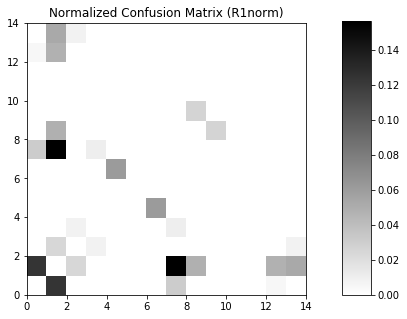

<Figure size 360x360 with 0 Axes>

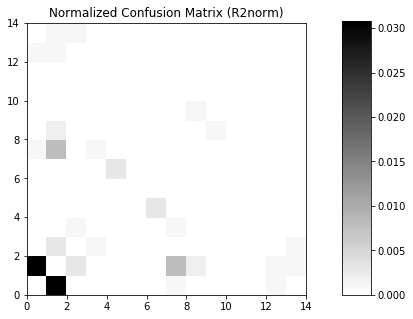

... storing 'L1_Round2' as categorical


IGRAPH U-W- 14 4 --
+ attr: weight (e)
+ edges:
0--1 0--1 1--7 1--7


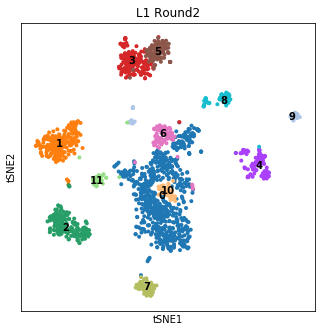

Round3 ...
Mean CV accuracy: 0.9421
Accuracy on the training set: 0.9884
Accuracy on the hold-out set: 0.9599


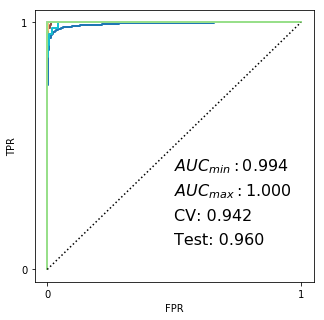

... storing 'L1_Round2_self-projection' as categorical


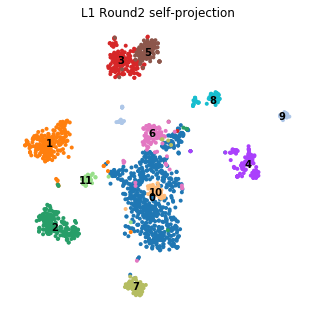

Accuracy on the training set: 0.9913
Accuracy on the hold-out set: 0.9490
Accuracy on the training set: 0.9928
Accuracy on the hold-out set: 0.9490
Max R1mat: 0.390244
Max R2mat: 0.013853


<Figure size 360x360 with 0 Axes>

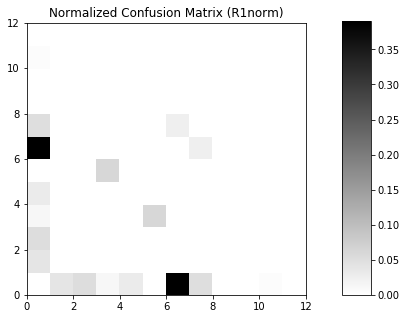

<Figure size 360x360 with 0 Axes>

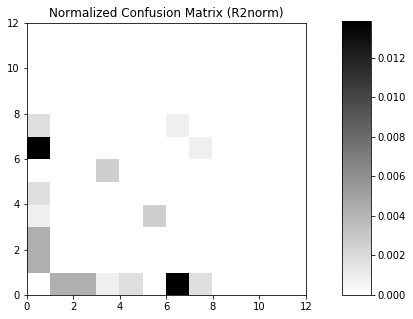

... storing 'L1_Round3' as categorical


IGRAPH U-W- 12 2 --
+ attr: weight (e)
+ edges:
0--6 0--6


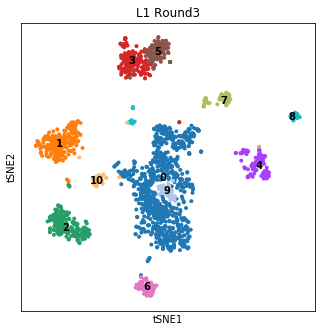

Round4 ...
Mean CV accuracy: 0.9677
Accuracy on the training set: 0.9907
Accuracy on the hold-out set: 0.9548


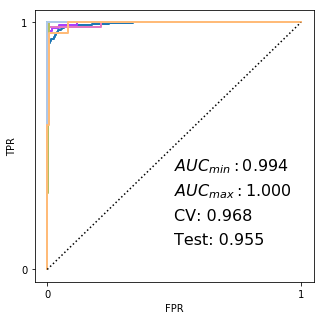

... storing 'L1_Round3_self-projection' as categorical


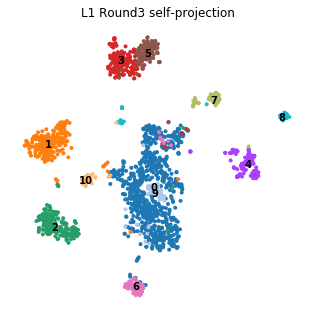

Accuracy on the training set: 0.9938
Accuracy on the hold-out set: 0.9597
Accuracy on the training set: 0.9907
Accuracy on the hold-out set: 0.9613
Max R1mat: 0.235294
Max R2mat: 0.006617


<Figure size 360x360 with 0 Axes>

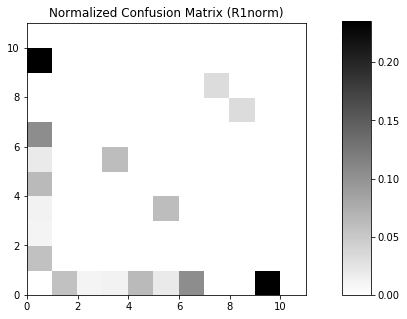

<Figure size 360x360 with 0 Axes>

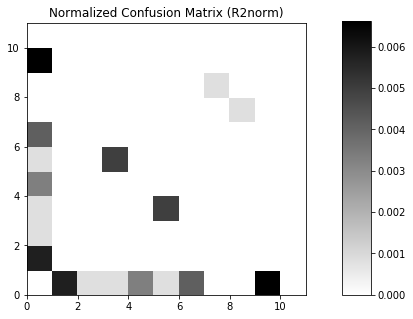

... storing 'L1_Round4' as categorical


IGRAPH U-W- 11 4 --
+ attr: weight (e)
+ edges:
0--6 0--9 0--6 0--9


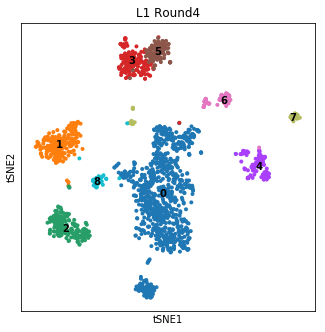

Round5 ...
Mean CV accuracy: 0.9742
Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.9831


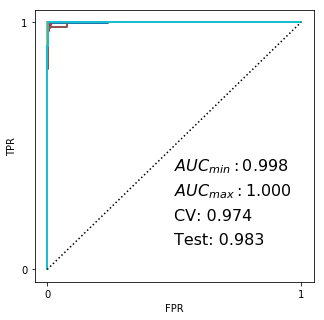

... storing 'L1_Round4_self-projection' as categorical


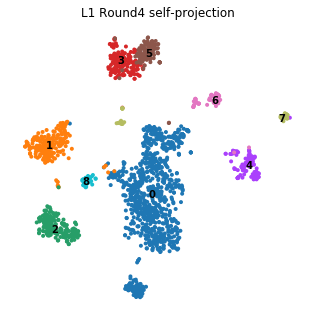

Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.9824
Accuracy on the training set: 0.9966
Accuracy on the hold-out set: 0.9831
Max R1mat: 0.080000
Max R2mat: 0.004658
Converge SCCAF_optimize min_acc!
m1: 0.080000
m2: 0.004658
Accuracy: 0.982362


In [7]:
SCCAF_optimize_all(min_acc=0.96, ad=ad, use='pca', basis ='tsne')

In [10]:
ad.write("../write/Baron_Mouse_reg.h5")

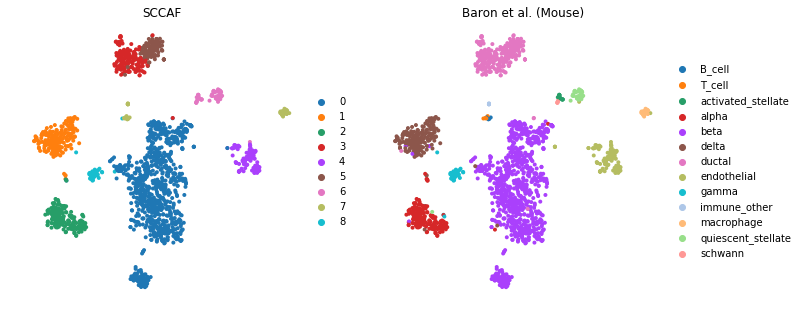

In [9]:
sc.pl.tsne(ad, color=['L1_result','cell',],frameon=False, title=['SCCAF','Baron et al. (Mouse)'])

## SCCAF recover with constraints

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`) and constrain the optimization with louvain clustering resolution 0.2 (`louvain_r0.2`).

In [10]:
sc.tl.louvain(ad, resolution=0.2, key_added='louvain_r0.2')
sc.tl.louvain(ad, resolution=0.5, key_added='louvain_r0.5')

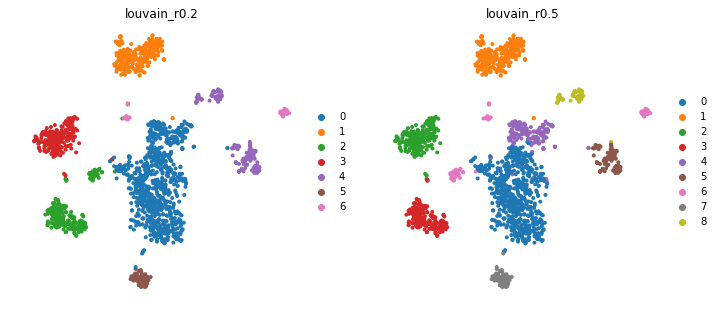

In [11]:
sc.pl.tsne(ad, color=['louvain_r0.2','louvain_r0.5',],frameon=False)

In [12]:
ad.obs['L2_Round0'] = ad.obs['L1_Round0']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9032
Accuracy on the training set: 0.9603
Accuracy on the hold-out set: 0.9087


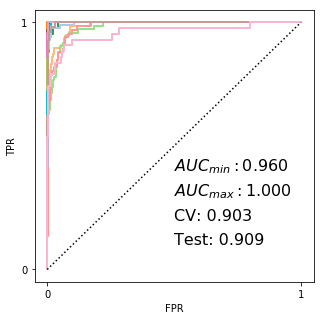

... storing 'L2_Round0_self-projection' as categorical


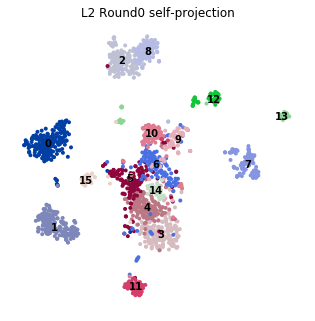

Accuracy on the training set: 0.9721
Accuracy on the hold-out set: 0.8930
Accuracy on the training set: 0.9496
Accuracy on the hold-out set: 0.9150
Max R1mat: 0.133333
Max R2mat: 0.011274


<Figure size 360x360 with 0 Axes>

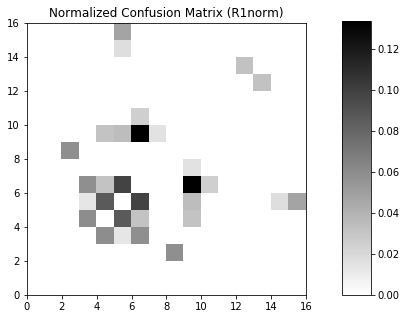

<Figure size 360x360 with 0 Axes>

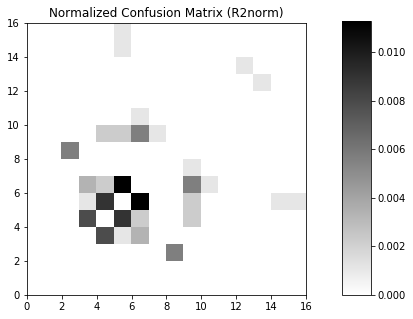

IGRAPH U-W- 16 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.133333
m2: 0.011274
Accuracy: 0.892970
start_iter: 0
R1norm_cutoff: 0.123333
R2norm_cutoff: 0.010274
Accuracy: 0.892970
Round1 ...
Mean CV accuracy: 0.9066
Accuracy on the training set: 0.9561
Accuracy on the hold-out set: 0.9192


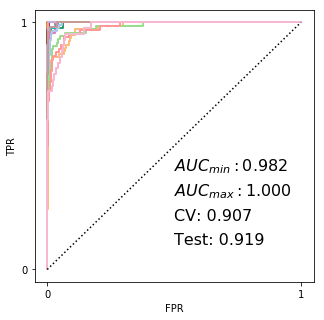

... storing 'L2_Round0_self-projection' as categorical


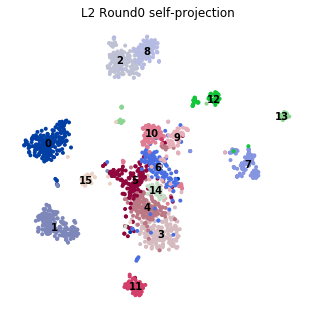

Accuracy on the training set: 0.9700
Accuracy on the hold-out set: 0.9066
Accuracy on the training set: 0.9678
Accuracy on the hold-out set: 0.8919
Max R1mat: 0.096774
Max R2mat: 0.011325


<Figure size 360x360 with 0 Axes>

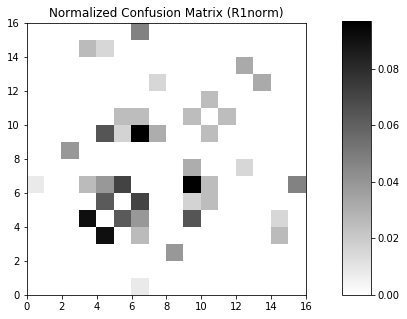

<Figure size 360x360 with 0 Axes>

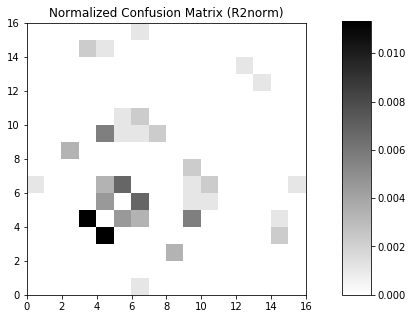

IGRAPH U-W- 16 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.096774
m2: 0.011325
Accuracy: 0.891920
start_iter: 0
R1norm_cutoff: 0.086774
R2norm_cutoff: 0.010325
Accuracy: 0.891920
Round1 ...
Mean CV accuracy: 0.9089
Accuracy on the training set: 0.9603
Accuracy on the hold-out set: 0.9003


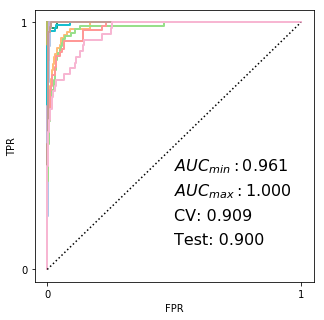

... storing 'L2_Round0_self-projection' as categorical


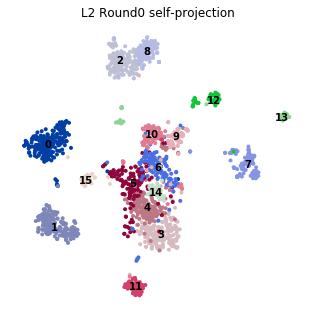

Accuracy on the training set: 0.9657
Accuracy on the hold-out set: 0.9045
Accuracy on the training set: 0.9646
Accuracy on the hold-out set: 0.9150
Max R1mat: 0.094340
Max R2mat: 0.009070


<Figure size 360x360 with 0 Axes>

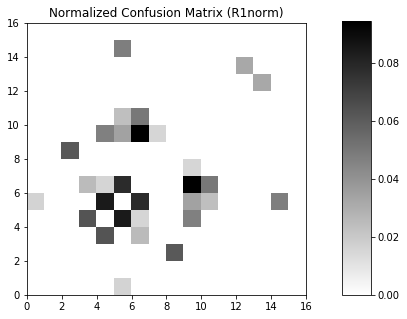

<Figure size 360x360 with 0 Axes>

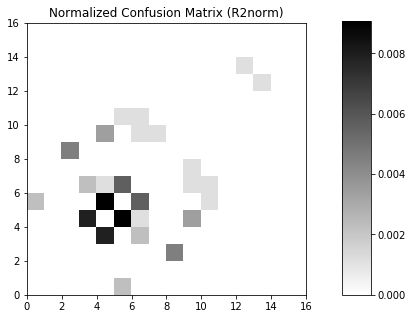

... storing 'L2_Round1' as categorical


IGRAPH U-W- 16 2 --
+ attr: weight (e)
+ edges:
6--9 6--9


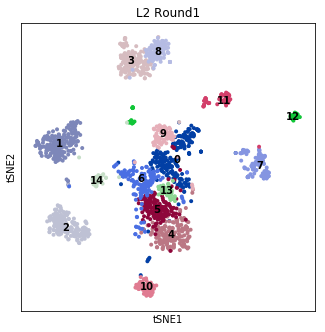

Round2 ...
Mean CV accuracy: 0.9033
Accuracy on the training set: 0.9577
Accuracy on the hold-out set: 0.9283


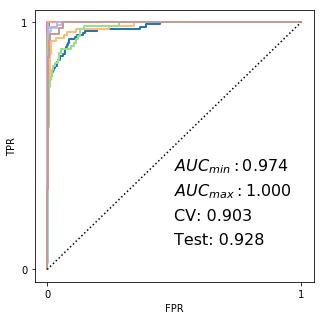

... storing 'L2_Round1_self-projection' as categorical


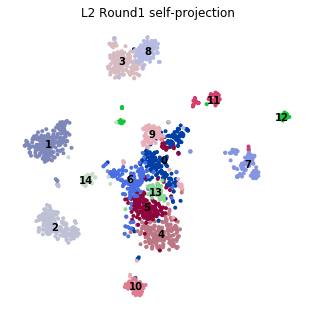

Accuracy on the training set: 0.9599
Accuracy on the hold-out set: 0.9128
Accuracy on the training set: 0.9642
Accuracy on the hold-out set: 0.9097
Max R1mat: 0.117647
Max R2mat: 0.009868


<Figure size 360x360 with 0 Axes>

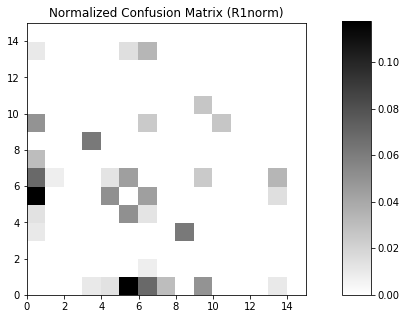

<Figure size 360x360 with 0 Axes>

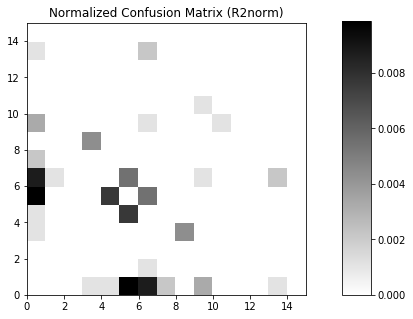

... storing 'L2_Round2' as categorical


IGRAPH U-W- 15 2 --
+ attr: weight (e)
+ edges:
0--5 0--5


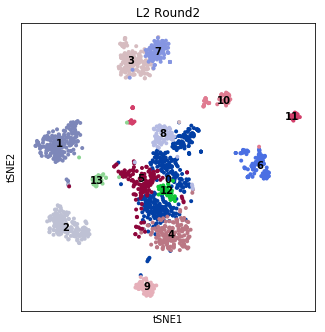

Round3 ...
Mean CV accuracy: 0.9245
Accuracy on the training set: 0.9669
Accuracy on the hold-out set: 0.8915


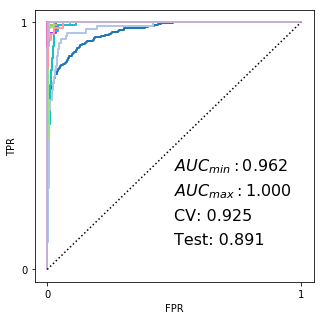

... storing 'L2_Round2_self-projection' as categorical


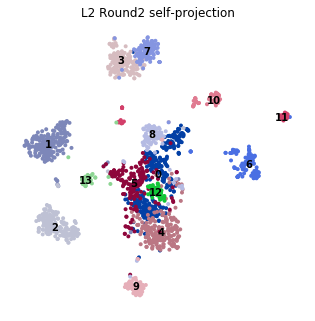

Accuracy on the training set: 0.9586
Accuracy on the hold-out set: 0.9097
Accuracy on the training set: 0.9728
Accuracy on the hold-out set: 0.8953
Max R1mat: 0.360656
Max R2mat: 0.027411


<Figure size 360x360 with 0 Axes>

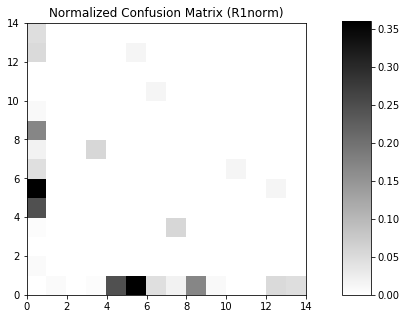

<Figure size 360x360 with 0 Axes>

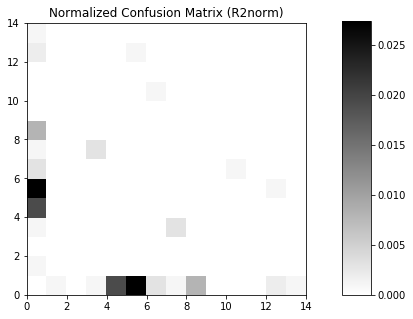

... storing 'L2_Round3' as categorical


IGRAPH U-W- 14 6 --
+ attr: weight (e)
+ edges:
0--4 0--5 0--8 0--4 0--5 0--8


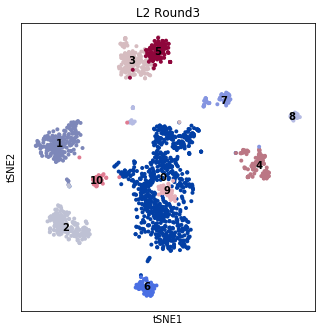

Round4 ...
Mean CV accuracy: 0.9597
Accuracy on the training set: 0.9907
Accuracy on the hold-out set: 0.9677


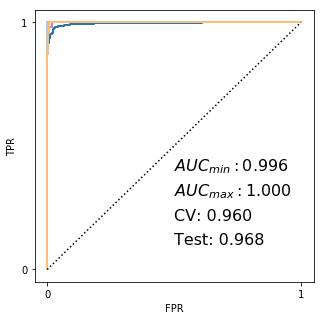

... storing 'L2_Round3_self-projection' as categorical


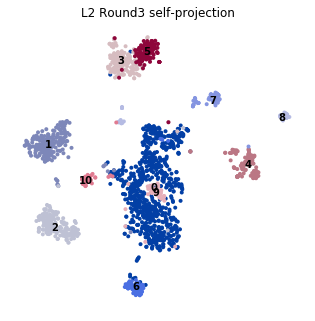

Accuracy on the training set: 0.9892
Accuracy on the hold-out set: 0.9629
Accuracy on the training set: 0.9907
Accuracy on the hold-out set: 0.9492
Max R1mat: 0.238095
Max R2mat: 0.006780


<Figure size 360x360 with 0 Axes>

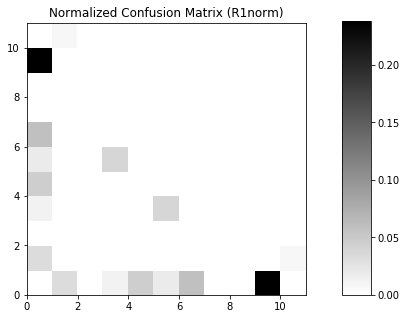

<Figure size 360x360 with 0 Axes>

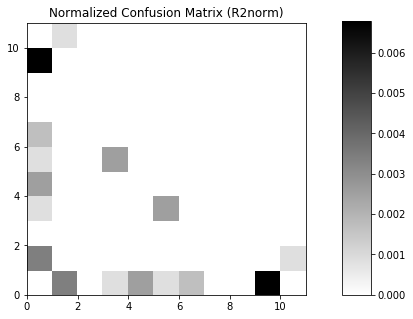

... storing 'L2_Round4' as categorical


IGRAPH U-W- 11 2 --
+ attr: weight (e)
+ edges:
0--9 0--9


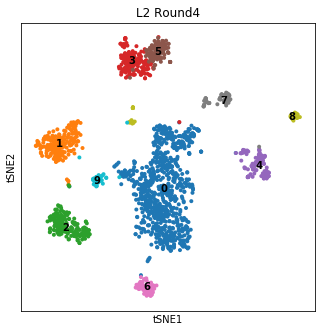

Round5 ...
Mean CV accuracy: 0.9777
Accuracy on the training set: 0.9952
Accuracy on the hold-out set: 0.9715


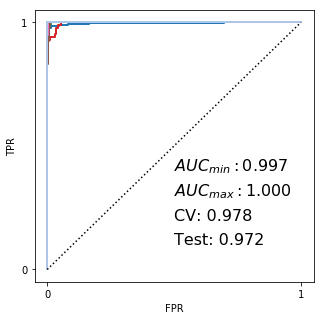

... storing 'L2_Round4_self-projection' as categorical


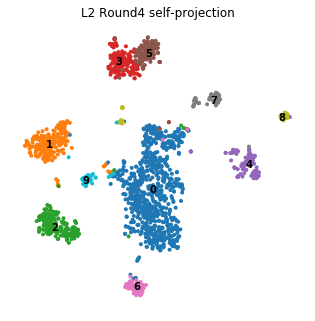

Accuracy on the training set: 0.9968
Accuracy on the hold-out set: 0.9676
Accuracy on the training set: 0.9952
Accuracy on the hold-out set: 0.9739
Max R1mat: 0.098039
Max R2mat: 0.004874


<Figure size 360x360 with 0 Axes>

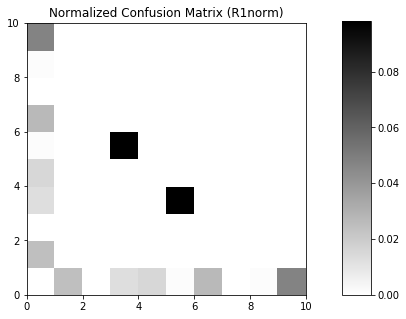

<Figure size 360x360 with 0 Axes>

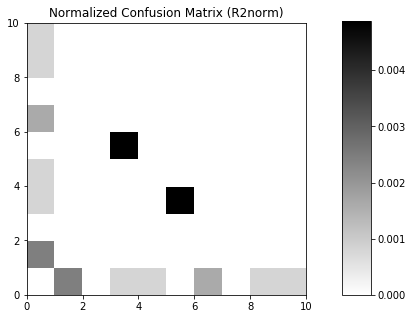

... storing 'L2_Round5' as categorical


IGRAPH U-W- 10 2 --
+ attr: weight (e)
+ edges:
3--5 3--5


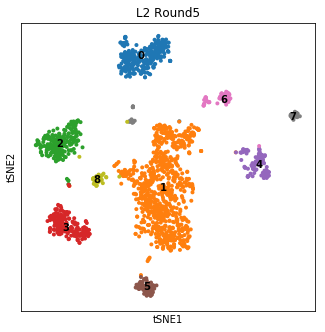

Round6 ...
Mean CV accuracy: 0.9915
Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.9769


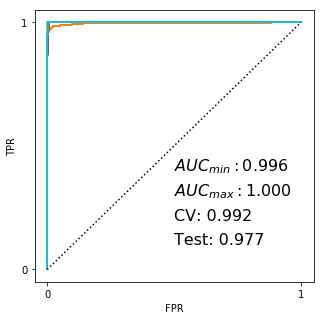

... storing 'L2_Round5_self-projection' as categorical


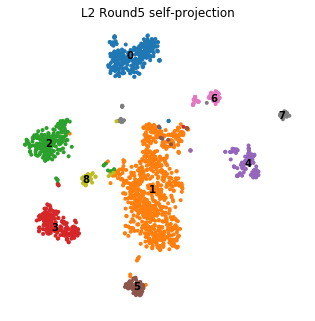

Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.9800
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9785
Max R1mat: 0.114286
Max R2mat: 0.003909
Converge SCCAF_optimize min_acc!
m1: 0.114286
m2: 0.003909
Accuracy: 0.976923


In [13]:
SCCAF_optimize_all(min_acc=0.975, ad=ad, use='pca', basis ='tsne',low_res='louvain_r0.2', prefix='L2')

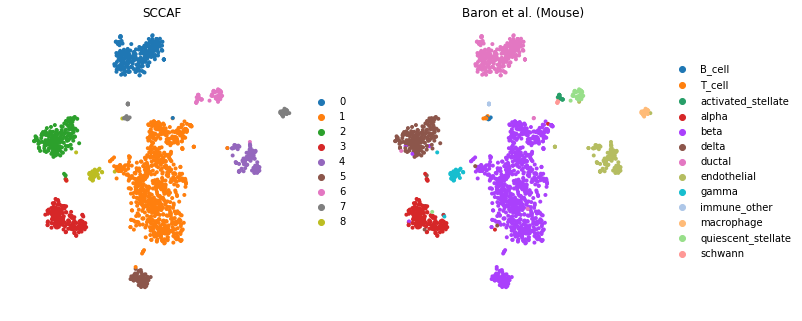

In [14]:
sc.pl.tsne(ad, color=['L2_result','cell',],frameon=False, title=['SCCAF','Baron et al. (Mouse)'])

# End